In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import shutil
from datetime import datetime
import tensorflow as tf
import keras

Using TensorFlow backend.


# State Data

In [2]:
api_url_data = 'https://api.covid19india.org/data.json'
r_data = requests.get(api_url_data)
data_time_series = r_data.json()

In [3]:
data_time_series.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
state_data = data_time_series.get('statewise')

In [5]:
state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []
lastupdatedtime_list = []

for j in range(len(state_data)):
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    state = state_data[j].get('state')
    lastupdatedtime = state_data[j].get('lastupdatedtime')
    lastupdatedtime = lastupdatedtime[:-9]
    
    if confirmed != '0':
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        state_list.append(state)
        lastupdatedtime_list.append(lastupdatedtime)

In [6]:
confirmed_list = np.array(confirmed_list, dtype = int)
recovered_list = np.array(recovered_list, dtype = int)
deaths_list = np.array(deaths_list, dtype = int)

active = np.subtract(confirmed_list, np.add(recovered_list, deaths_list))
death_rate = np.divide(deaths_list, confirmed_list)*100
recovery_rate = np.divide(recovered_list, confirmed_list)*100

death_rate_list = []
recovery_rate_list = []

for s in death_rate:
    s = round(s,1)
    death_rate_list = np.append(death_rate_list, s)
for p in recovery_rate:
    p = round(p,1)
    recovery_rate_list = np.append(recovery_rate_list, p)

In [7]:
state_data = {'Confirmed':confirmed_list[1:], 'Active':active[1:], 'Recovered':recovered_list[1:], 'Deaths':deaths_list[1:], 'Recovery Rate(%)':recovery_rate_list[1:], 'Death Rate(%)':death_rate_list[1:], 'Last Updated':lastupdatedtime_list[1:]}
df_state_data = pd.DataFrame(state_data, index=[state_list[1:]])
df_state_data.to_csv('State_data.csv')
df_state_data.to_html('State_data.html', border=0, justify = 'left')
df_state_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
Maharashtra,4666,3862,572,232,12.3,5.0,20/04/2020
Delhi,2081,1603,431,47,20.7,2.3,20/04/2020
Gujarat,2066,1858,131,77,6.3,3.7,21/04/2020
Rajasthan,1659,1429,205,25,12.4,1.5,21/04/2020
Tamil Nadu,1520,1046,457,17,30.1,1.1,20/04/2020
Madhya Pradesh,1485,1271,138,76,9.3,5.1,20/04/2020
Uttar Pradesh,1294,1136,140,18,10.8,1.4,21/04/2020
Telangana,872,663,186,23,21.3,2.6,20/04/2020
Andhra Pradesh,757,639,96,22,12.7,2.9,21/04/2020
Karnataka,415,286,112,17,27.0,4.1,21/04/2020


# Case Time Plot:

In [8]:
time = data_time_series.get('cases_time_series')

In [9]:
date_list = []
dailyconfirmed_list = []
dailydeceased_list = []
dailyrecovered_list = []

totalconfirmed_list = []
totaldeceased_list = []
totalrecovered_list = []
t = 0
for t in range(len(time)):
    
    date = time[t].get('date')
    date_list.append(date)
    
    dailyconfirmed = time[t].get('dailyconfirmed')
    dailyconfirmed_list.append(dailyconfirmed)
    
    dailydeceased = time[t].get('dailydeceased')
    dailydeceased_list.append(dailydeceased)
    
    dailyrecovered = time[t].get('dailyrecovered')
    dailyrecovered_list.append(dailyrecovered)
    
    totalconfirmed = time[t].get('totalconfirmed')
    totalconfirmed_list.append(totalconfirmed)
    
    totalrecovered = time[t].get('totalrecovered')
    totalrecovered_list.append(totalrecovered)
    
    totaldeceased = time[t].get('totaldeceased')
    totaldeceased_list.append(totaldeceased)

In [10]:
totalconfirmed_list = np.array(totalconfirmed_list, dtype=int)
totalrecovered_list = np.array(totalrecovered_list, dtype=int)
totaldeceased_list = np.array(totaldeceased_list, dtype=int)

dailyconfirmed_list = np.array(dailyconfirmed_list, dtype=int)
dailyrecovered_list = np.array(dailyrecovered_list, dtype=int)
dailydeceased_list = np.array(dailydeceased_list, dtype=int)

In [11]:
total_confirmation_increased_today = confirmed_list[0] - totalconfirmed_list[-1]
total_recovery_increased_today = recovered_list[0] - totalrecovered_list[-1]
total_death_increased_today = deaths_list[0] - totaldeceased_list[-1]

In [12]:
total_data = {'Confirmed':str(confirmed_list[0]) + ' (+' + str(dailyconfirmed_list[-1]) + ')', 'Active':active[0], 'Recovered':str(recovered_list[0]) + ' (+' + str(dailyrecovered_list[-1]) + ')', 'Deaths':str(deaths_list[0]) + ' (+' + str(dailydeceased_list[-1]) + ')', 'Recovery Rate(%)':recovery_rate_list[0], 'Death Rate(%)':death_rate_list[0]}
df_total_data = pd.DataFrame(total_data, index=[0])
df_total_data.to_csv('total_data.csv')
df_total_data.to_html('total_data.html', border=0, justify = 'center', index=False)
df_total_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,18970 (+427),15079,3290 (+17),601 (+9),17.3,3.2


In [13]:
date_list_splitted = []
for i in date_list:
    date_splitted = i[0:2]
    date_list_splitted.append(date_splitted)

In [14]:
day_range = 14

daily_data = {'Daily Confirmations':dailyconfirmed_list[-day_range:], 'Daily Recoveries':dailyrecovered_list[-day_range:], 'Daily Deaths':dailydeceased_list[-day_range:], 'Total Confirmations':totalconfirmed_list[-day_range:], 'Total Recoveries':totalrecovered_list[-day_range:], 'Total Deaths':totaldeceased_list[-day_range:]}
df_daily_data = pd.DataFrame(daily_data, index = [date_list[-day_range:]])
df_daily_data.to_csv('daily_data.csv')
df_daily_data.to_html('daily_data.html', border=0, justify = 'left')
df_daily_data

,Daily Confirmations,Daily Recoveries,Daily Deaths,Total Confirmations,Total Recoveries,Total Deaths
08 April,565,96,20,5914,565,181
09 April,813,70,46,6727,635,227
10 April,871,151,22,7598,786,249
11 April,854,186,40,8452,972,289
12 April,758,114,42,9210,1086,331
13 April,1243,112,27,10453,1198,358
14 April,1031,167,37,11484,1365,395
15 April,886,144,27,12370,1509,422
16 April,1061,258,26,13431,1767,448
17 April,922,273,38,14353,2040,486


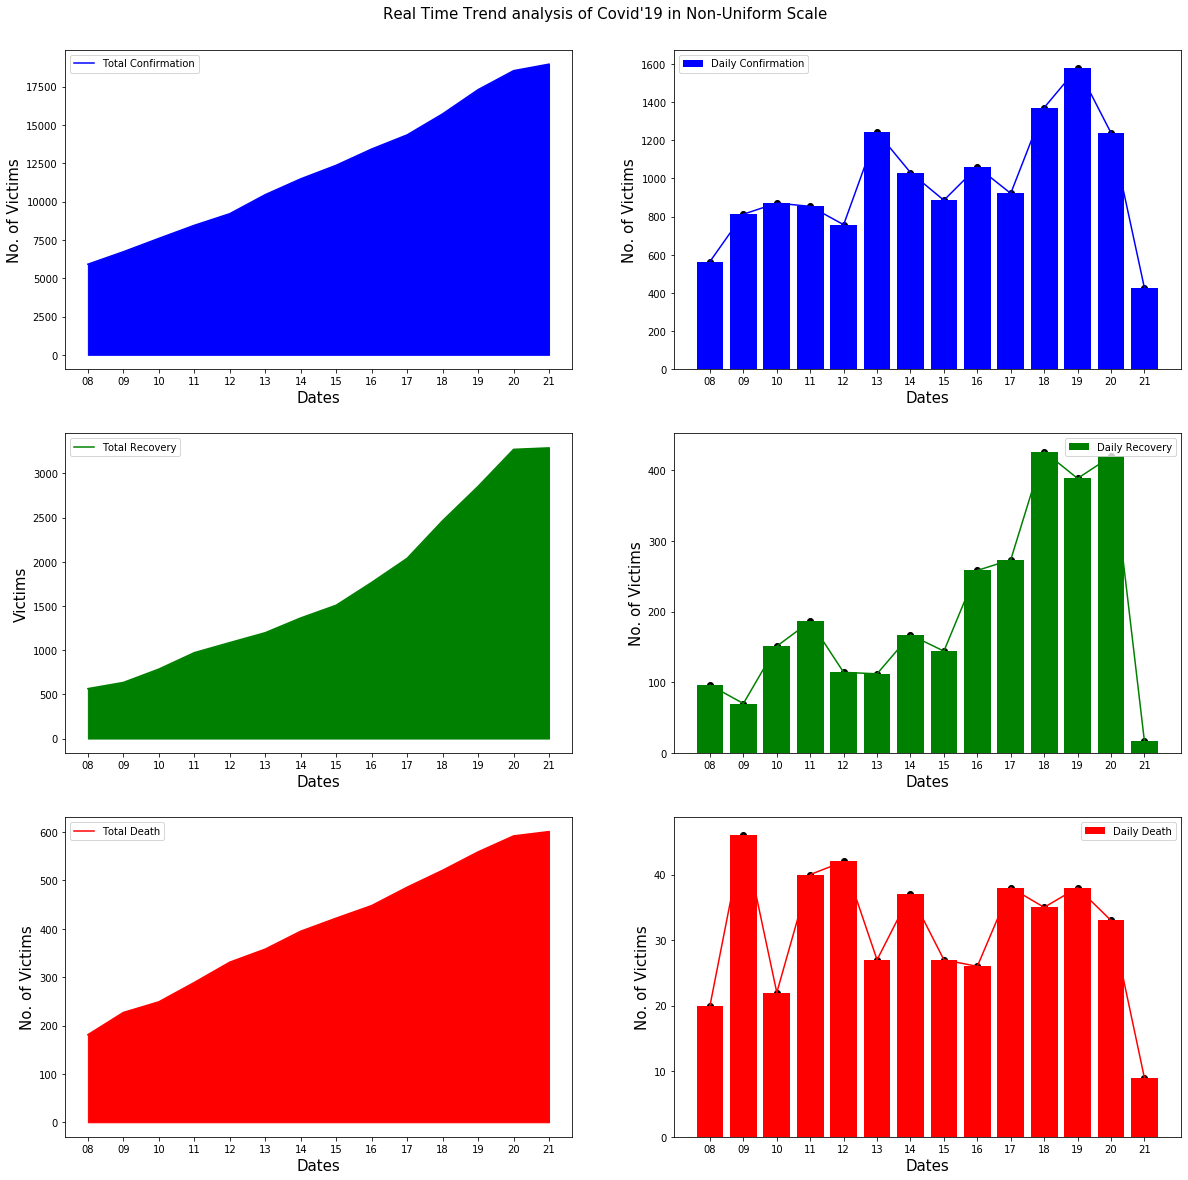

In [15]:
day_range = 14

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.plot(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
# plt.scatter(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,2)
plt.bar(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.plot(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.scatter(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,3)
plt.plot(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
# plt.scatter(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,4)
plt.bar(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.scatter(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,5)
plt.plot(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
# plt.scatter(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,6)
plt.bar(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.plot(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red')
plt.scatter(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailydeceased_list[-day_range:], color='black')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.suptitle("Real Time Trend analysis of Covid'19 in Non-Uniform Scale", fontsize=15, x=0.5,y=0.91)
plt.savefig('plot1.png')

In [16]:
x_conf = totalconfirmed_list[-22:-1]
x_rec = totalrecovered_list[-22:-1]
x_det = totaldeceased_list[-22:-1]

print(x_conf)
print(x_rec)
print(x_det)

print(len(x_conf))

[ 1635  2059  2545  3105  3684  4293  4777  5349  5914  6727  7598  8452
  9210 10453 11484 12370 13431 14353 15724 17304 18543]
[ 150  169  191  230  286  329  394  469  565  635  786  972 1086 1198
 1365 1509 1767 2040 2466 2854 3273]
[ 47  53  69  83  96 118 134 161 181 227 249 289 331 358 395 422 448 486
 521 559 592]
21


Text(0.5, 1.0, 'Death')

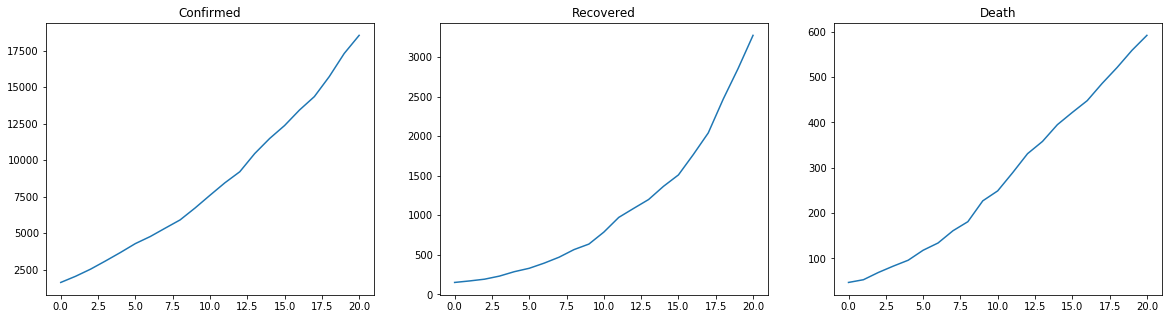

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(x_conf)
plt.title('Confirmed')

plt.subplot(1,3,2)
plt.plot(x_rec)
plt.title('Recovered')

plt.subplot(1,3,3)
plt.plot(x_det)
plt.title('Death')

In [18]:
pred_list_conf = [20514, 19718, 20345, 20454, 20532]
pred_list_rec = [3692, 3727, 3906, 3823, 3690]
pred_list_det = [623, 636, 623, 639, 617]

In [19]:
train = str(input("Do you want to train? "))

if train.upper() == 'Y':
    pred_list_conf = []
    pred_list_rec = []
    pred_list_det = []

    i = 0
    for i in range(5):
        window_size = 3
        dataset = tf.data.Dataset.from_tensor_slices(x_conf)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_conf))
        dataset = dataset.batch(2).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 2500, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_conf.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        pred_daily = model.predict(x_conf[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_conf.append(pred_daily)

    j = 0
    for j in range(5):
        window_size = 3
        dataset = tf.data.Dataset.from_tensor_slices(x_rec)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_rec))
        dataset = dataset.batch(2).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 2500, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_rec.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        pred_daily = model.predict(x_rec[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_rec.append(pred_daily)

    k = 0
    for k in range(5):
        window_size = 3
        dataset = tf.data.Dataset.from_tensor_slices(x_det)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_det))
        dataset = dataset.batch(2).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 2500, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_det.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        pred_daily = model.predict(x_det[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_det.append(pred_daily)
        
elif train.upper() == 'N':
    pass

Do you want to train? n


In [20]:
print(pred_list_conf)
print(pred_list_rec)
print(pred_list_det)

[20514, 19718, 20345, 20454, 20532]
[3692, 3727, 3906, 3823, 3690]
[623, 636, 623, 639, 617]


In [21]:
pred_conf = sum(pred_list_conf)//len(pred_list_conf)
pred_rec = sum(pred_list_rec)//len(pred_list_rec)
pred_det = sum(pred_list_det)//len(pred_list_det)

In [22]:
print(x_conf, pred_conf)
print(x_rec, pred_rec)
print(x_det, pred_det)

[ 1635  2059  2545  3105  3684  4293  4777  5349  5914  6727  7598  8452
  9210 10453 11484 12370 13431 14353 15724 17304 18543] 20312
[ 150  169  191  230  286  329  394  469  565  635  786  972 1086 1198
 1365 1509 1767 2040 2466 2854 3273] 3767
[ 47  53  69  83  96 118 134 161 181 227 249 289 331 358 395 422 448 486
 521 559 592] 627


In [23]:
today_conf = pred_conf - x_conf[-1]
today_rec = pred_rec - x_rec[-1]
today_det = pred_det - x_det[-1]
today_act = today_conf - (today_rec + today_det)

print(today_conf, today_rec, today_det, today_act)

1769 494 35 1240


# ICMR Reports

In [24]:
report_date_list = []
totalsamplestested_list = []
totalpositivecases_list = []

report_date_list = np.array(['13/03/2020', '18/03/2020', '19/03/2020', '19/03/2020',
       '20/03/2020', '20/03/2020', '21/03/2020', '21/03/2020',
       '22/03/2020', '22/03/2020', '23/03/2020', '23/03/2020',
       '24/03/2020', '24/03/2020', '25/03/2020',
       '27/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020', 
       '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020', '13/04/2020', '14/04/2020',
       '15/04/2020', '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020'])

totalsamplestested_list = np.array([  6500,  13125,  13316,  14175,  14376,  15404,  15701,  16911,
        16999,  18127,  18383,  20707,  20864,  22694,  25144,
        27688,  47951,  55851,  69245,  79950,  89534, 101068,
       114015, 127919, 144910, 161330, 179374, 195748, 217554, 244893,  274599, 302956, 335123, 372123,
       401586])

totalpositivecases_list = np.array([  78,  150,  168,  182,  206,  236,  271,  315,  341,  396,  415,
        471,  482,  536,  581,  691, 1637, 2056, 2653, 3113,
       3554, 4135, 4616, 5114, 5705, 6872, 7703, 8312, 9341, 10307, 11297, 12581, 14098, 16365, 17615])

In [25]:
reports = {"Total Sample Tested":totalsamplestested_list[-day_range:], "Total Positive Cases":totalpositivecases_list[-day_range:]}
df_reports = pd.DataFrame(reports, index = [report_date_list[-day_range:]])
df_reports.to_csv('ICMR_report_data.csv')
df_reports.to_html('ICMR_report_data.html', border=0, justify = 'left')
df_reports

,Total Sample Tested,Total Positive Cases
06/04/2020,101068,4135
07/04/2020,114015,4616
08/04/2020,127919,5114
09/04/2020,144910,5705
10/04/2020,161330,6872
11/04/2020,179374,7703
12/04/2020,195748,8312
13/04/2020,217554,9341
14/04/2020,244893,10307
15/04/2020,274599,11297


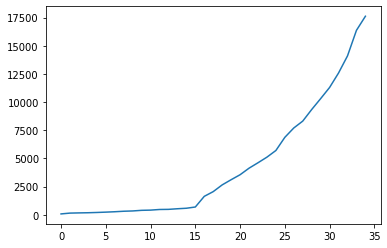

In [26]:
plt.plot(totalpositivecases_list)

In [27]:
date_split_icmr = []
for i in report_date_list:
    i_split = i[:2]
    date_split_icmr.append(i_split)

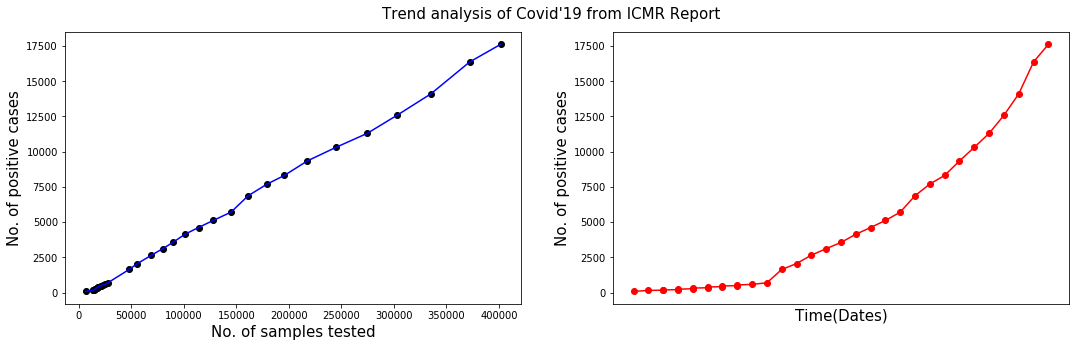

In [28]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
plt.scatter(totalsamplestested_list, totalpositivecases_list, color='black')
plt.plot(totalsamplestested_list, totalpositivecases_list, color='blue')
plt.xlabel('No. of samples tested', fontsize=15)
plt.ylabel('No. of positive cases', fontsize=15)

plt.subplot(1,2,2)
plt.scatter(report_date_list, totalpositivecases_list, color='red')
plt.plot(report_date_list, totalpositivecases_list, color='red')
plt.xticks([])
plt.xlabel('Time(Dates)', fontsize=15)
plt.ylabel('No. of positive cases', fontsize=15)

plt.suptitle("Trend analysis of Covid'19 from ICMR Report", fontsize=15, y=0.95)
plt.savefig('ICMR_stat.png')

### Future Prediction using ICMR Data

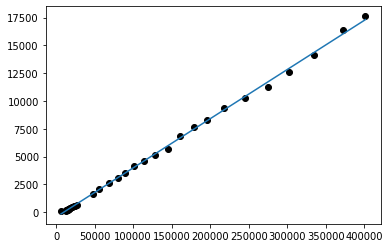

In [29]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

init_guess = [1,1]
popt, pcov = curve_fit(func, totalsamplestested_list, totalpositivecases_list, init_guess)
a = popt[0]
b = popt[1]

m=len(totalsamplestested_list)
theta_0=np.multiply(b, np.ones(m))
theta_1=np.multiply(a,np.ones(m))
hypothesis=np.add(np.multiply(totalsamplestested_list, theta_1),theta_0)

plt.scatter(totalsamplestested_list, totalpositivecases_list, color='black')
plt.plot(totalsamplestested_list, hypothesis)

In [30]:
location = ['USA', 'Italy', 'Germany', 'South Korea']
test_world = [1762032, 721732, 918460, 466804]
conf_world = [367758, 132547, 103375, 10331]
validation = totalsamplestested_list[-5:]

In [31]:
y_pred = []
for items in test_world:
    pred = a*items + b
    y_pred.append(pred)

In [32]:
y_pred = np.array(y_pred, dtype=int)
y_pred

array([77411, 31453, 40144, 20191])

# HTML

In [33]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y at %H:%M:%S")

intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>
    <div class="jumbotron text-center">
        <h1 class="text-center"><b>Insights of Covid-19</b></h1>
        <p class="text-center">Get the live information about the Novel Corona Virus spread in India.<br>
            Last updated on """+str(dt_string)+""" <br>Click <a href="https://telegra.ph/Data-Sources-for-Covidtracker-indiaml-04-05" target="_blank">here</a> to get the list of the data source.
            <br>
            <br>
            <b>Stay Home</b>
            <br>
            <b>Stay Safe</b>
            <br>
            <b>Let's fight against Corona Together</b>
        </p>
    </div>

<div class="container">
    <div class="row justify-content-center">
    
        <div class="col-lg-6 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total Confirmed</b></h4>
                      <p class="card-text">""" + str(confirmed_list[0]) + ' (+' + str(dailyconfirmed_list[-1]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-6 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total Active</b></h4>
                      <p class="card-text">""" + str(active[0]) + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-6 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total Recovered</b></h4>
                      <p class="card-text">""" + str(recovered_list[0]) + ' (+' + str(dailyrecovered_list[-1]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-6 col mb-3">
            <div class="card bg-dark border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total Deaths</b></h4>
                      <p class="card-text">""" + str(deaths_list[0]) + ' (+' + str(dailydeceased_list[-1]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-6 col mb-3">
            <div class="card bg-info border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Recovery Rate</b></h4>
                      <p class="card-text">""" + str(recovery_rate_list[0]) + '%' + """</p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-6 col mb-3">
            <div class="card bg-secondary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Death Rate</b></h4>
                      <p class="card-text">""" + str(death_rate_list[0]) + '%' + """</p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>
<br>
<h3 class="text-center">
    <b>Today's Predictions using State of the Art AI Algorithms</b>
</h3>
<br>

<div class="container">
    <div class="row justify-content-center">

        <div class="col-lg-3 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Confirmations</b></h4>
                      <p class="card-text">""" + str(today_conf) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Active</b></h4>
                      <p class="card-text">""" + str(today_act) + """</p>
                    </div>
                  </div>
            </div>
        </div>

         <div class="col-lg-3 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">             
                      <h4 class="card-title"><b>Recoveries</b></h4>
                      <p class="card-text">""" + str(today_rec) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3primary col mb-3">
            <div class="card bg-dark border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Deaths</b></h4>
                      <p class="card-text">""" + str(today_det) + """</p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>
<br>
<h3 class="text-center">
    <b>Analysing Corona Virus spread in different states</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

intro_ = open("intro.html","w")
intro_.write(intro)
intro_.close()

In [34]:
confirmed_list_chart = []

i = 0
for i in confirmed_list:
    confirmed_list_chart.append(i)

In [35]:
chart_state = """
</div>
</div>


<script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
<canvas id="myChart"></canvas>
<script>
var ctx = document.getElementById('myChart').getContext('2d');
var mixedChart = new Chart(ctx, {
    type: 'doughnut',
    options: {
        title: {
            display: true,
            text: 'Comparison of confirmations between top 10 states'
        },
    },
    data: {
        datasets: [{
            label: 'Total Confirmations',
            data: """ + str(confirmed_list_chart[1:11]) + """,
            backgroundColor: [
                'rgba(0, 0, 0, 0.5)',
                'rgba(0, 0, 255, 0.5)',
                'rgba(0, 255, 0, 0.5)',
                'rgba(0, 255, 255, 0.5)',
                'rgba(255, 0, 0, 0.5)',
                'rgba(255, 255, 0, 0.5)',
                'rgba(255, 0, 255, 0.5)',
                'rgba(255, 200, 255, 0.5)',
                'rgba(100, 100, 0, 0.5)',
                'rgba(10, 0, 100, 0.5)',
            ],
        }],
        labels: """ + str(state_list[1:11]) + """
    },
});
</script>
"""

chart_state_ = open("chart_state.html","w")
chart_state_.write(chart_state)
chart_state_.close()

In [36]:
daily_data_intro = """
<br>
<br>
<h3 class="text-center">
    <b>Trend analysis of Corona Virus spread using the data of last 14 days</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

daily_data_intro_ = open('daily_data_intro.html', 'w')
daily_data_intro_.write(daily_data_intro)
daily_data_intro_.close()

In [37]:
date_list_chart = []
totalconfirmed_list_chart = []
totalrecovered_list_chart = []
totaldeceased_list_chart = []
dailyconfirmed_list_chart = []
dailyrecovered_list_chart = []
dailydeceased_list_chart = []

i,j,k,l,m,n,o = 0,0,0,0,0,0,0

for i in date_list:
    date_list_chart.append(i)
    
for j in totalconfirmed_list:
    totalconfirmed_list_chart.append(j)

for k in totalrecovered_list:
    totalrecovered_list_chart.append(k)
    
for l in totaldeceased_list:
    totaldeceased_list_chart.append(l)
    
for m in dailyconfirmed_list:
    dailyconfirmed_list_chart.append(m)
    
for n in dailyrecovered_list:
    dailyrecovered_list_chart.append(n)
    
for o in dailydeceased_list:
    dailydeceased_list_chart.append(o)

In [38]:
chart_total = """
</div>
</div>

<script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
<canvas id="myChart_3"></canvas>
<script>
var ctx_3 = document.getElementById('myChart_3').getContext('2d');
var mixedChart_3 = new Chart(ctx_3, {
    type: 'line',
    data: {
        datasets: [{
            label: 'Total Confirmations',
            data: """ + str(totalconfirmed_list_chart[-day_range:]) + """,
            borderColor: "rgba(0,0,255,1)",
            fill: true
        }, {
            label: 'Total Recoveries',
            data: """ + str(totalrecovered_list_chart[-day_range:]) + """,
            backgroundColor: [
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',

            ],
            type: 'bar',
            fill: true,
            order: 1
        }, {
            label: 'Total Deaths',
            data: """ + str(totaldeceased_list_chart[-day_range:]) + """,
            backgroundColor: [
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
            ],
            type: 'bar',
            order: 2
        }],
        labels: """ + str(date_list_chart[-day_range:]) + """
    },
});
</script>
<br>
"""

chart_total_ = open("chart_total.html","w")
chart_total_.write(chart_total)
chart_total_.close()

In [39]:
chart_daily = """
<script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
<canvas id="myChart_2"></canvas>
<script>
var ctx_2 = document.getElementById('myChart_2').getContext('2d');
var mixedChart_2 = new Chart(ctx_2, {
    type: 'line',
    data: {
        datasets: [{
            label: 'Daily Confirmations',
            data: """ + str(dailyconfirmed_list_chart[-day_range:]) + """,
            borderColor: "rgba(0,0,255,1)",
            fill: true
        }, {
            label: 'Daily Recoveries',
            data: """ + str(dailyrecovered_list_chart[-day_range:]) + """,
            borderColor: "rgba(0,220,0,1)",
            backgroundColor: [
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
                'rgba(0, 220, 0, 1)',
            ],
            type: 'bar',
            order: 2
        }, {
            label: 'Daily Deaths',
            data: """ + str(dailydeceased_list_chart[-day_range:]) + """,
            borderColor: "rgba(255,0,0,1)",
            backgroundColor: [
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
                'rgba(255, 0, 0, 1)',
            ],
            type: 'bar',
            order: 3
        }],
        labels: """ + str(date_list_chart[-day_range:]) + """
    },
});
</script>
"""

chart_daily_ = open("chart_daily.html","w")
chart_daily_.write(chart_daily)
chart_daily_.close()

In [40]:
ICMR_report_data_intro = """
<br>
<br>
<h3 class="text-center">
    <b>Test Data of last 14 days from ICMR</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

ICMR_report_data_intro_ = open('ICMR_report_data_intro.html', 'w')
ICMR_report_data_intro_.write(ICMR_report_data_intro)
ICMR_report_data_intro_.close()

In [41]:
report_date_list_chart = []
totalsamplestested_list_chart = []
totalpositivecases_list_chart = []

i,j,k = 0,0,0

for i in report_date_list:
    i = i[:-5]
    report_date_list_chart.append(i)
    
for j in totalsamplestested_list:
    totalsamplestested_list_chart.append(j)
    
for k in totalpositivecases_list:
    totalpositivecases_list_chart.append(k)

In [42]:
icmr_stat_sample = """
</div>
</div>

<script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
<canvas id="myChart_1"></canvas>
<script>
var ctx_1 = document.getElementById('myChart_1').getContext('2d');
var mixedChart_1 = new Chart(ctx_1, {
    type: 'line',
    data: {
        labels: """ + str(totalsamplestested_list_chart[-day_range:]) + """,
        datasets: [{
            label: 'Total Confirmations',
            data: """ + str(totalpositivecases_list_chart[-day_range:]) + """,
            borderColor: "rgba(255,0,0,1)",
            fill: true
        }]
    },
    options: {
        scales: {
            xAxes: [{
                scaleLabel: {
                    display: true,
                    labelString: 'Total Sample tested'
                }
            }]
        }
    }
});
</script>
"""

icmr_stat_sample_ = open("icmr_stat_sample.html","w")
icmr_stat_sample_.write(icmr_stat_sample)
icmr_stat_sample_.close()

In [43]:
prediction_body = """
<br>
<br>
<h3 class="text-center">
    <b>Comparison with other countries using Machine Learning</b>
</h3>

<p class="text-justify" >
  <ul>
    <li>
      <b>""" + str(location[0]) + """</b> has tested <b>""" + str(test_world[0]) + """</b> samples out of which <b>""" + str(conf_world[0]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[0]) + """</b> cases might be found confirmed.
    </li>
    
    <li>
      <b>""" + str(location[1]) + """</b> has tested <b>""" + str(test_world[1]) + """</b> samples out of which <b>""" + str(conf_world[1]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[1]) + """</b> cases might be found confirmed.
    </li>

    <li>
      <b>""" + str(location[2]) + """</b> has tested <b>""" + str(test_world[2]) + """</b> samples out of which <b>""" + str(conf_world[2]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[2]) + """</b> cases might be found confirmed.
    </li>

    <li>
      <b>""" + str(location[3]) + """</b> has tested <b>""" + str(test_world[3]) + """</b> samples out of which <b>""" + str(conf_world[3]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[3]) + """</b> cases might be found confirmed.
    </li>
  </ul>
</p>
"""

prediction_body_ = open("prediction_body.html","w")
prediction_body_.write(prediction_body)
prediction_body_.close()

In [44]:
footer = """
<footer class="py-3 bg-dark">
    <div class="container">
        <p class="m-0 text-center text-white">
          Copyright <i class="fa fa-copyright"></i> 2020. All rights reserved. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank">Rajarshi Bhadra</a>
        </p>
</footer>
</body>
</html>
"""

footer_ = open("footer.html","w")
footer_.write(footer)
footer_.close()

In [45]:
with open('intro.html') as rd: 
    intro = rd.read()
    
with open('State_data.html') as rd:
    state_wise = rd.read()
    state_wise = state_wise[:25] + "table table-striped table-bordered table-sm text-left " + state_wise[:35] + str(' align="left"') + state_wise[35:]
    state_wise = state_wise[:137] + ' class="thead-dark"' + state_wise[137:]
    
with open('chart_state.html') as rd: 
    pie_chart = rd.read()     
     
with open('daily_data_intro.html') as rd: 
    daily_intro = rd.read()
    
with open('daily_data.html') as rd: 
    daily = rd.read()
    daily = daily[:25] + "table table-striped table-bordered table-sm text-left " + daily[:35] + str(' align="left"') + daily[35:]
    daily = daily[:137] + ' class="thead-dark"' + daily[137:]
    
with open('chart_total.html') as rd: 
    line_chart_total = rd.read()
    
with open('chart_daily.html') as rd: 
    line_chart_daily = rd.read()
    
with open('ICMR_report_data_intro.html') as rd: 
    ICMR_intro = rd.read() 

with open('ICMR_report_data.html') as rd:
    ICMR = rd.read()
    ICMR = ICMR[:25] + "table table-striped table-bordered table-sm text-left " + ICMR[:35] + str(' align="left"') + ICMR[35:]
    ICMR = ICMR[:137] + ' class="thead-dark"' + ICMR[137:]
    
with open('icmr_stat_sample.html') as rd: 
    line_chart_ICMR = rd.read()
    
with open('prediction_body.html') as rd: 
    prediction = rd.read()
    
with open('footer.html') as rd: 
    footer = rd.read()
    
data = intro + state_wise + pie_chart + daily_intro + daily + line_chart_total + line_chart_daily + ICMR_intro + ICMR + line_chart_ICMR + prediction + footer

with open ('index.html', 'w') as fp: 
    fp.write(data) 

# Check for Errors:

### Confirmation of State data and Total Data

In [46]:
# Confirmed
if np.sum(confirmed_list[1:]) == np.sum(confirmed_list[0]):
    print(True)
else:
    print(np.sum(confirmed_list[1:]))
    print(np.sum(confirmed_list[0]))

# Active
if np.sum(active[1:]) == np.sum(active[0]):
    print(True)
else:
    print(np.sum(active[1:]))
    print(np.sum(active[0]))

# Recovered
if np.sum(recovered_list[1:]) == np.sum(recovered_list[0]):
    print(True)
else:
    print(np.sum(recovered_list[1:]))
    print(np.sum(recovered_list[0]))    

# Death
if np.sum(deaths_list[1:]) == np.sum(deaths_list[0]):
    print(True)
else:
    print(np.sum(deaths_list[1:]))
    print(np.sum(deaths_list[0]))    

True
True
True
True


### Confirmation Check bewtween State Data, Total Data & Daily Data

In [47]:
# Confirmed
if totalconfirmed_list[-2] + dailyconfirmed_list[-1] == totalconfirmed_list[-1]:
    print(True)
else:
    print(totalconfirmed_list[-2] + dailyconfirmed_list[-1])
    print(totalconfirmed_list[-1])

# Recovered
if totalrecovered_list[-2] + dailyrecovered_list[-1] == totalrecovered_list[-1]:
    print(True)
else:
    print(totalrecovered_list[-2] + dailyrecovered_list[-1])
    print(totalrecovered_list[-1])


# Death
if totaldeceased_list[-2] + dailydeceased_list[-1] == totaldeceased_list[-1]:
    print(True)
else:
    print(totaldeceased_list[-2] + dailyconfirmed_list[-1])
    print(totaldeceased_list[-1])


True
True
True
